In [2]:
import cirq
import cirq_google as cg
import numpy as np
import matplotlib.pyplot as plt

## Section 1. More on Sycamore
Prints a summary of Google's Sycamore processor configuration, providing a glimpse into its capabilities.

In [3]:
print(cg.Sycamore)

                                             (0, 5)───(0, 6)
                                             │        │
                                             │        │
                                    (1, 4)───(1, 5)───(1, 6)───(1, 7)
                                    │        │        │        │
                                    │        │        │        │
                           (2, 3)───(2, 4)───(2, 5)───(2, 6)───(2, 7)───(2, 8)
                           │        │        │        │        │        │
                           │        │        │        │        │        │
                  (3, 2)───(3, 3)───(3, 4)───(3, 5)───(3, 6)───(3, 7)───(3, 8)───(3, 9)
                  │        │        │        │        │        │        │        │
                  │        │        │        │        │        │        │        │
         (4, 1)───(4, 2)───(4, 3)───(4, 4)───(4, 5)───(4, 6)───(4, 7)───(4, 8)───(4, 9)
         │        │        │        │        │        │   

## Section 2: Basic Circuit
A simple circuit with two qubits is created to demonstrate basic operations using Hadamard and CNOT gates, followed by measurement. The simulation shows the distribution of results over multiple repetitions.

In [4]:
"""Creating a circuit."""
# Define two qubits.
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")


# Create a circuit from the list of operations.
circuit = cirq.Circuit(
cirq.H(a),
cirq.CNOT(a, b),
    cirq.measure(a,b)
)
print("Circuit:\n")
print(circuit)

Circuit:

a: ───H───@───M───
          │   │
b: ───────X───M───


In [5]:
print("\nMoments in the circuit:\n")
for i, moment in enumerate(circuit):
    print('Moment {}: {}'.format(i, moment))


Moments in the circuit:

Moment 0:   ╷ None
╶─┼──────
a │ H
  │
Moment 1:   ╷ None
╶─┼──────
a │ @
  │ │
b │ X
  │
Moment 2:   ╷ None
╶─┼──────
a │ M
  │ │
b │ M
  │


In [6]:
print(repr(circuit))

cirq.Circuit([
    cirq.Moment(
        cirq.H(cirq.NamedQubit('a')),
    ),
    cirq.Moment(
        cirq.CNOT(cirq.NamedQubit('a'), cirq.NamedQubit('b')),
    ),
    cirq.Moment(
        cirq.measure(cirq.NamedQubit('a'), cirq.NamedQubit('b')),
    ),
])


In [7]:
simulator = cirq.Simulator()
# Pass the circuit to the simulator.run method.
result = simulator.run(circuit, repetitions=20)
print("Measurement results:")
print(result)


Measurement results:
a,b=11101110101110000010, 11101110101110000010


## Section 3: Slightly complex circuit
Adds more quantum gates (T and CZ) to increase the complexity, simulates the circuit, and then displays measurement results.

In [8]:

"""Creating a more complex circuit."""
# Define two qubits.
a = cirq.NamedQubit("a")
b = cirq.NamedQubit("b")

In [9]:
# Create a circuit with various quantum gates
circuit = cirq.Circuit(
    cirq.H(a),
    cirq.T(b),             
    cirq.CZ(a, b),           
    cirq.measure(a, b)
)
print("\nCircuit with additional gates:\n")
print(circuit)


Circuit with additional gates:

a: ───H───@───M───
          │   │
b: ───T───@───M───


In [10]:
# Simulate the new circuit
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=20)
print("\nMeasurement results for the new circuit:")
print(result)


Measurement results for the new circuit:
a,b=11000011001111011111, 00000000000000000000


## Section 4: Did we forget the noise?
A noise model is introduced to simulate more realistic quantum computing conditions by using a depolarizing noise effect on qubits. The results compare how noise impacts measurements.

In [11]:
"""Noise Model Simulation."""
# Define a simple noise model
noise_model = cirq.ConstantQubitNoiseModel(cirq.depolarize(p=0.01))

# Apply the noise model to the circuit
noisy_circuit = cirq.Circuit(
    cirq.H(a),
    cirq.T(b),
    cirq.CZ(a, b),
    cirq.measure(a, b)
)

noisy_simulator = cirq.DensityMatrixSimulator(noise=noise_model)
noisy_result = noisy_simulator.run(noisy_circuit, repetitions=20)

print("\nMeasurement results with noise model:")
print(noisy_result)


Measurement results with noise model:
a,b=11011101010000101101, 10000000000000000000


## Section 5: Visualize the quantum states
Uses matplotlib to plot the probabilities of state vectors in a circuit, offering a clear visualization of quantum state distributions.

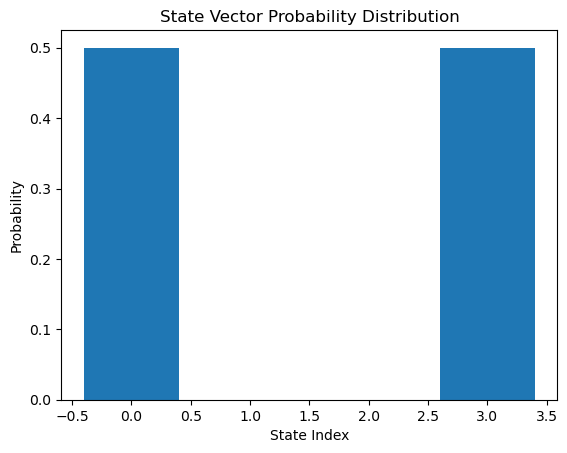

In [12]:
"""Visualizing Quantum States."""
# Create a simple circuit and simulate to obtain state vector
circuit2 = cirq.Circuit(
    cirq.H(a),
    cirq.CNOT(a, b)
)
state_simulator = cirq.Simulator()
state_result = state_simulator.simulate(circuit2)

# Visualize state vector probabilities
state_vector = np.abs(state_result.final_state_vector) ** 2
plt.bar(range(len(state_vector)), state_vector)
plt.xlabel('State Index')
plt.ylabel('Probability')
plt.title('State Vector Probability Distribution')
plt.show()

## Section 6: Let's build a quantum Teleportation Circuit
A three-qubit circuit demonstrates quantum teleportation by using entanglement and Bell-state measurements. After obtaining measurements, the results are used to correct the receiver's qubit.

In [13]:
# Define three qubits
qubit_sender = cirq.NamedQubit("Sender")
qubit_aux = cirq.NamedQubit("Auxiliary")
qubit_receiver = cirq.NamedQubit("Receiver")

In [14]:
# Create the quantum teleportation circuit
circuit = cirq.Circuit()

In [15]:
# Step 1: Prepare the entangled pair (Bell state)
circuit.append([cirq.H(qubit_aux), cirq.CNOT(qubit_aux, qubit_receiver)])

# Step 2: Apply an arbitrary state to the sender's qubit (e.g., |+>)
circuit.append([cirq.H(qubit_sender)])

# Step 3: Bell-state measurement on the sender and auxiliary qubits
circuit.append([cirq.CNOT(qubit_sender, qubit_aux), cirq.H(qubit_sender)])
circuit.append([cirq.measure(qubit_sender, key='sender_m'), cirq.measure(qubit_aux, key='auxiliary_m')])

In [16]:
# Print the circuit for verification
print("\nQuantum Teleportation Circuit:\n")
print(circuit)


Quantum Teleportation Circuit:

Auxiliary: ───H───@───X───M('auxiliary_m')───────────────────
                  │   │
Receiver: ────────X───┼──────────────────────────────────────
                      │
Sender: ──────H───────@───H──────────────────M('sender_m')───


In [17]:

# Simulate the circuit and capture the measurements
simulator = cirq.Simulator()
result = simulator.run(circuit, repetitions=1)

# Access measurement data through the Pandas DataFrame
measurements = result.data
print("\nMeasurement Results (DataFrame):")
print(measurements)


Measurement Results (DataFrame):
   auxiliary_m  sender_m
0            1         0


In [18]:
# Extract measurement results
sender_m = measurements['sender_m'][0]
auxiliary_m = measurements['auxiliary_m'][0]

In [19]:

# Create a correction circuit based on measurement results
receiver_circuit = cirq.Circuit()

# Correct X if the auxiliary qubit was measured as 1
if auxiliary_m == 1:
    receiver_circuit.append(cirq.X(qubit_receiver))

# Correct Z if the sender qubit was measured as 1
if sender_m == 1:
    receiver_circuit.append(cirq.Z(qubit_receiver))

In [20]:

# Print the correction circuit
print("\nCorrection Circuit for Receiver's Qubit:\n")
print(receiver_circuit)

# Simulate the final state of the receiver's qubit after corrections
final_state_simulator = cirq.Simulator()
final_state = final_state_simulator.simulate(receiver_circuit)
print("\nFinal State of Receiver's Qubit:")
print(final_state.final_state_vector)


Correction Circuit for Receiver's Qubit:

Receiver: ───X───

Final State of Receiver's Qubit:
[0.+0.j 1.+0.j]


## Section 7: Drawbacks

Discussing potential limitations of Cirq, including restricted access to actual quantum hardware, documentation issues due to rapid evolution, a relatively small user base, and still-developing noise/error correction features. <br>

1. Limited Hardware Access: <br>
Although Cirq can simulate circuits on classical computers, running those circuits on actual Google hardware requires access to Google's quantum computing services, which might not be readily available to all researchers or developers.

2. Documentation and Learning Curve: <br>
As a rapidly evolving project, some features may lack comprehensive documentation, making it difficult for newcomers to learn and effectively utilize all of Cirq's capabilities.

3. Community and Support: <br>
The Cirq user base and support community, while growing, are still relatively small compared to other quantum computing ecosystems, potentially limiting collaborative opportunities and troubleshooting resources.

4. Noise and Error Correction: <br>
Although Cirq provides some noise models and supports error correction techniques, these features are still developing. Users requiring specialized error correction may need to implement additional custom solutions.

## Section 8: References

https://quantumai.google/cirq/dev/notebooks <br>
https://www.qbraid.com/blog/launch-new-cirq-v1-2-0-notebook-in-4-clicks